# 下載 COCO 資料集
- train (訓練)
- val (驗證)
- annotations (標註)

In [3]:
import os
import urllib.request

# 設定下載目標路徑
download_dir = 'coco_dataset'
os.makedirs(download_dir, exist_ok=True)

In [4]:
# 設定資料集的 URL（COCO 2017 訓練集和驗證集）
train_images_url = "http://images.cocodataset.org/zips/train2017.zip"
val_images_url = "http://images.cocodataset.org/zips/val2017.zip"
train_annot_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
val_annot_url = "http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip"

# 下載資料
def download_file(url, output_dir):
    filename = os.path.join(output_dir, url.split("/")[-1])
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url, filename)
    else:
        print(f"{filename} already exists.")

# 下載 COCO 資料集
download_file(train_images_url, download_dir)
download_file(val_images_url, download_dir)
download_file(train_annot_url, download_dir)
download_file(val_annot_url, download_dir)

print("Download completed!")


Download completed!


In [5]:
import zipfile

# 解壓 zip 文件
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted {zip_path} to {extract_to}")

# 解壓下載的 zip 文件
def unzip_all_files(download_dir):
    for zip_filename in os.listdir(download_dir):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(download_dir, zip_filename)
            unzip_to = os.path.join(download_dir, zip_filename.replace('.zip', ''))
            unzip_file(zip_path, unzip_to)

unzip_all_files(download_dir)

Extracted coco_dataset\annotations_trainval2017.zip to coco_dataset\annotations_trainval2017
Extracted coco_dataset\stuff_annotations_trainval2017.zip to coco_dataset\stuff_annotations_trainval2017
Extracted coco_dataset\train2017.zip to coco_dataset\train2017
Extracted coco_dataset\val2017.zip to coco_dataset\val2017


載入標註資料

In [6]:
from pycocotools.coco import COCO

# 載入 COCO 訓練集的標註資料
ann_file = './coco_dataset/annotations_trainval2017/annotations/instances_train2017.json'
coco = COCO(ann_file)

# 查詢某一張圖片的標註
img_id = coco.getImgIds()[0]  # 取得第一張圖片的 ID
img_info = coco.loadImgs(img_id)[0]
print(img_info)

# 取得該圖片的標註 (例如，物件檢測的框)
anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
for ann in anns:
    print(ann)

loading annotations into memory...
Done (t=24.82s)
creating index...
index created!
{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 39189

# 影像讀取與處理
- 灰階
- 模糊
- 銳化
    - kernel sharpening
    - Laplacian
- 閾值化
    - 全域閾值化
    - Adaptive Thresholding

In [51]:
import cv2
import matplotlib.pyplot as plt
import random
import glob
import numpy as np
import json

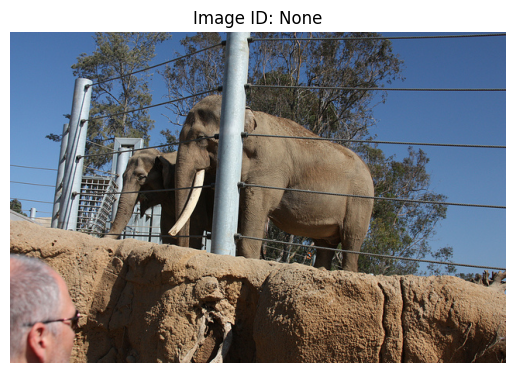

Image File: val2017\000000293300.jpg
Image ID: None


In [52]:
# 讀取 COCO annotations JSON（請確保這個路徑正確）
coco_annotation_path = "./coco_dataset/annotations_trainval2017/annotations/instances_val2017.json"
with open(coco_annotation_path, "r") as f:
    coco_data = json.load(f)

# 隨機選擇一張 COCO 影像
image_paths = glob.glob("./coco_dataset/val2017/*.jpg")
random_image_path = random.choice(image_paths)
image_filename = random_image_path.split("/")[-1]  # 取得檔名（例如：000000397133.jpg）

# 在 JSON 中找到對應的 Image ID
image_id = None
for img_info in coco_data["images"]:
    if img_info["file_name"] == image_filename:
        image_id = img_info["id"]
        break

# 讀取影像
image = cv2.imread(random_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 讀取 BGR，轉為 RGB

# 顯示影像及 ID
plt.imshow(image)
plt.axis("off")
plt.title(f"Image ID: {image_id}")
plt.show()

# 顯示 Image ID
print(f"Image File: {image_filename}")
print(f"Image ID: {image_id}")

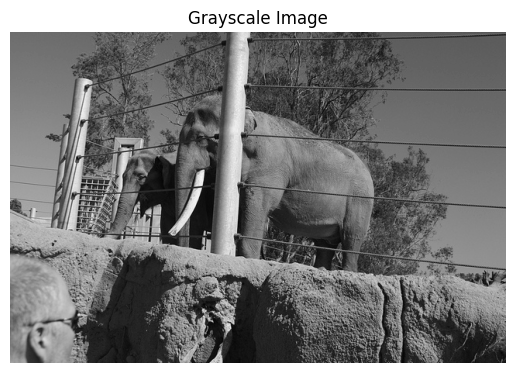

In [53]:
# 灰階
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

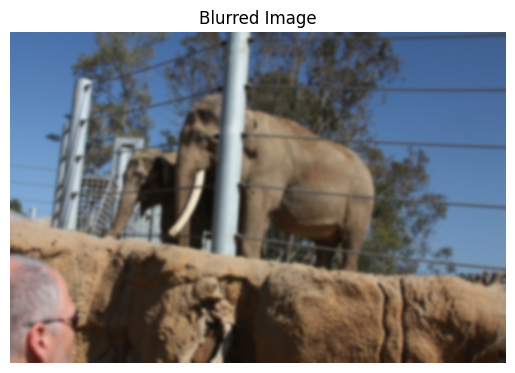

In [54]:
#模糊
blur = cv2.GaussianBlur(image, (11, 11), 0)
plt.imshow(blur)
plt.axis("off")
plt.title("Blurred Image")
plt.show()

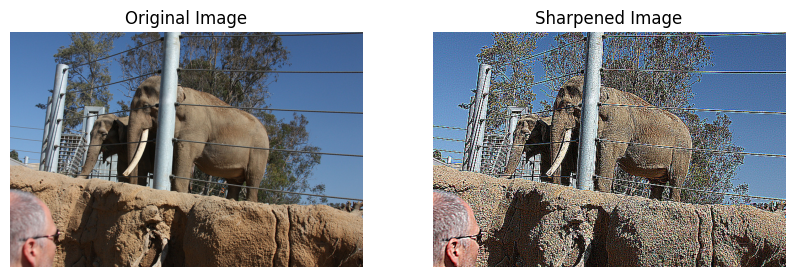

In [55]:
# 銳化
# 自訂銳化卷積核
kernel_sharpening = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

# 應用濾波器
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

# 顯示原圖與銳化後的影像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.axis("off")
plt.title("Sharpened Image")

plt.show()

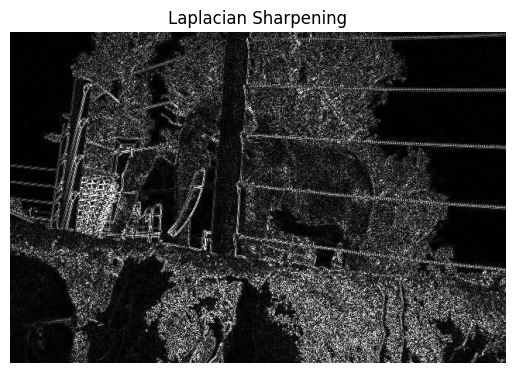

In [56]:
# 使用灰階圖片
# 拉普拉斯濾波
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# 轉換為 8-bit 顯示
laplacian = cv2.convertScaleAbs(laplacian)

# 顯示結果
plt.imshow(laplacian, cmap="gray")
plt.axis("off")
plt.title("Laplacian Sharpening")
plt.show()

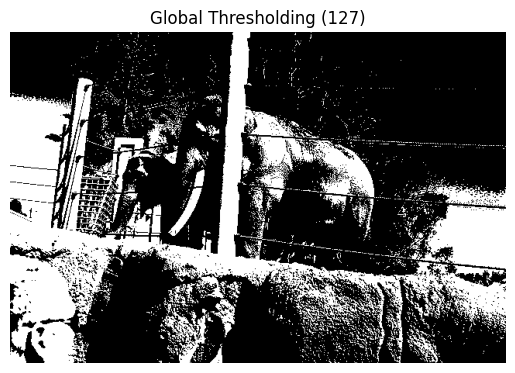

In [57]:
# 全域閾值化
# 設定閾值為 127，低於 127 的變為 0，高於 127 的變為 255
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 顯示結果
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.title("Global Thresholding (127)")
plt.show()

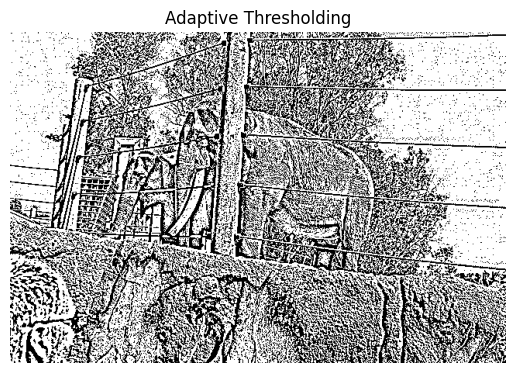

In [58]:
# 使用自適應閾值
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 11, 2
)

# 顯示結果
plt.imshow(adaptive_thresh, cmap="gray")
plt.axis("off")
plt.title("Adaptive Thresholding")
plt.show()

## 邊緣偵測、輪廓偵測

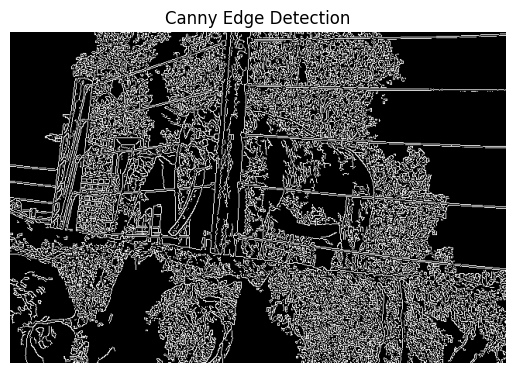

In [59]:
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detection")
plt.show()

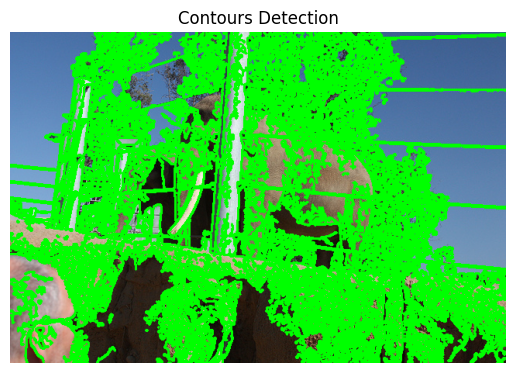

In [60]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(contour_image)
plt.axis("off")
plt.title("Contours Detection")
plt.show()

# 影像形態學處理（Morphological Operations）
- 影像形態學處理主要用於強化影像的結構特徵，常見操作包括：
    - 腐蝕（Erosion）：移除小區域的雜訊、縮小物件邊界。
    - 膨脹（Dilation）：擴大物件範圍、填補小洞。
    - 開運算（Opening）：先腐蝕再膨脹，用來移除小型雜訊。
    - 閉運算（Closing）：先膨脹再腐蝕，用來填補小洞。

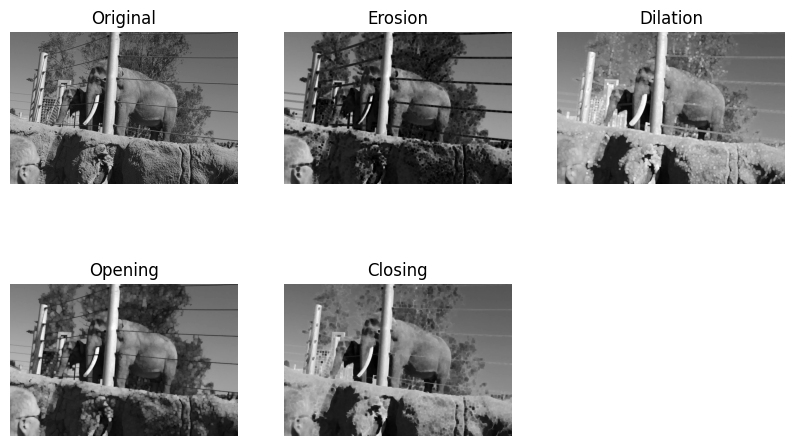

In [66]:
# 定義 5x5 核心（kernel）
kernel = np.ones((5, 5), np.uint8)

# **腐蝕（Erosion）**
erosion = cv2.erode(gray, kernel, iterations=1)

# **膨脹（Dilation）**
dilation = cv2.dilate(gray, kernel, iterations=1)

# **開運算（Opening）：先腐蝕再膨脹**
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

# **閉運算（Closing）：先膨脹再腐蝕**
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# 顯示結果
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [gray, erosion, dilation, opening, closing]

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()